<h1  style="color:red;font-size:40pt;font-weight:700"> Task3 Reducing the System to Single Node </h1>

In [ ]:
import pypsa
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline
plt.rc("figure", figsize=(8, 8))

<h1  style="color:white;font-size:20pt;font-weight:700"> Importing the data </h1>

In [2]:
network = pypsa.examples.ac_dc_meshed(from_master=True) 

INFO:pypsa.io:Imported network ac-dc-meshed.nc has buses, carriers, generators, global_constraints, lines, links, loads


In [3]:
network.loads

,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
London,London,,,0.0,0.0,-1.0
Frankfurt,Frankfurt,,,0.0,0.0,-1.0
Norway,Norway,,,0.0,0.0,-1.0
Norwich,Norwich,,,0.0,0.0,-1.0
Bremen,Bremen,,,0.0,0.0,-1.0
Manchester,Manchester,,,0.0,0.0,-1.0


<h1  style="color:white;font-size:20pt;font-weight:700"> Adding all loads to Frankfurt </h1>

In [8]:
network.loads_t.p_set
asd = pd.DataFrame(data={ "daff":[ 0 for i in network.loads_t.p_set.index] },index=network.loads_t.p_set.index)
for _ in network.loads_t.p_set.columns :
    asd.daff += network.loads_t.p_set[_]
 

In [15]:
network.loads_t.p = pd.DataFrame(data={'Frankfurt': {pd.Timestamp('2015-01-01 00:00:00'): 3166.98030901,
        pd.Timestamp('2015-01-01 01:00:00'): 3980.8548184492997,
        pd.Timestamp('2015-01-01 02:00:00'): 1688.8193441862002,
        pd.Timestamp('2015-01-01 03:00:00'): 3340.0698087618,
        pd.Timestamp('2015-01-01 04:00:00'): 2689.4391944122003,
        pd.Timestamp('2015-01-01 05:00:00'): 4343.585015384,
        pd.Timestamp('2015-01-01 06:00:00'): 3238.8453754112,
        pd.Timestamp('2015-01-01 07:00:00'): 2840.0164348623002,
        pd.Timestamp('2015-01-01 08:00:00'): 3788.2424634550007,
        pd.Timestamp('2015-01-01 09:00:00'): 3470.7753201724}})

In [22]:
network.generators

,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,type,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Manchester Wind,Manchester,2793.651603,1.000000,0.110000,80.0,True,100.0,wind,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Manchester Gas,Manchester,196.615168,0.350026,4.532368,50000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Norway Wind,Norway,2184.374796,1.000000,0.090000,100.0,True,100.0,wind,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Norway Gas,Norway,158.251250,0.356836,5.892845,20000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Frankfurt Wind,Frankfurt,2129.456122,1.000000,0.100000,110.0,True,100.0,wind,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Frankfurt Gas,Frankfurt,102.676953,0.351666,4.086322,80000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


<h1  style="color:white;font-size:20pt;font-weight:700"> Adding all p_set to Frankfurt </h1>

In [17]:
csv = pd.read_csv(r"C:\Users\Asus\Downloads\ali.csv")

In [23]:
csv.index = csv["Generator"] 


In [38]:
csv = csv.drop(csv.index[0])

In [97]:
network.loads_t.p_set

,London,Norwich,Frankfurt2,Bremen,Norway,Manchester,Frankfurt
snapshots,,,,,,,
1/1/2015 0:00,35.796244,415.462564,398.047847,640.086378,820.035836,857.551440,3166.980309
1/1/2015 1:00,976.824561,262.606147,432.436106,703.554334,854.834047,750.599624,3980.854818
1/1/2015 2:00,250.587312,418.476353,379.803928,440.836130,42.550744,156.564876,1688.819344
1/1/2015 3:00,130.753145,552.959539,868.361764,612.576306,647.548233,527.870822,3340.069809
1/1/2015 4:00,151.100169,218.159858,548.770755,803.436781,884.073873,83.897759,2689.439194
1/1/2015 5:00,931.857052,791.976266,828.665243,605.400687,509.062449,676.623319,4343.585015
1/1/2015 6:00,289.848287,531.870681,449.290752,641.090590,595.607965,731.137100,3238.845375
1/1/2015 7:00,864.343322,23.513467,699.163766,408.008541,291.642450,553.344889,2840.016435
1/1/2015 8:00,689.577264,970.059068,915.866780,912.247776,2.153493,298.338082,3788.242463


In [93]:
network.loads = pd.DataFrame(data={'bus': {'Frankfurt': 'Frankfurt'},'carrier': {'Frankfurt': ''}   ,
        'type': {'Frankfurt': '' } ,
        'p_set': {'Frankfurt': 0.0 } ,
        'q_set': {'Frankfurt': 0.0 } ,
        'sign': {'Frankfurt': -1.0}

        },)
network.loads

,bus,carrier,type,p_set,q_set,sign
Frankfurt,Frankfurt,,,0.0,0.0,-1.0


<h1  style="color:white;font-size:20pt;font-weight:700"> The new reduced form of generators </h1>

In [48]:
csv.drop("Generator",axis="columns")

,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,type,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Frankfurt Wind,Frankfurt,7107.482522,1.000000,NaN,290,True,100,wind,Slack,NaN,...,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN
Frankfurt Gas,Frankfurt,457.543371,0.351809,NaN,150000,True,0,gas,PQ,NaN,...,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN


In [91]:
csv

,Generator,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Frankfurt Wind,Frankfurt Wind,Frankfurt,7107.482522,1.000000,NaN,290,True,100,wind,Slack,...,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN
Frankfurt Gas,Frankfurt Gas,Frankfurt,457.543371,0.351809,NaN,150000,True,0,gas,PQ,...,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN


In [58]:
loads_t = pd.read_csv(r"C:\Users\Asus\Downloads\Ali-Bokon\PyPSA\examples\ac-dc-meshed\ac-dc-data\loads-p_set-Copy.csv")

In [69]:
loads_t.set_index("snapshots",inplace=False)
loads_t_p_set = loads_t

In [70]:
network.loads_t.p_set = loads_t_p_set
network.loads_t.p_set.set_index("snapshots",inplace=True)

In [101]:
network.loads_t.p_set.index = network.loads_t.p.index 

<h1  style="color:white;font-size:20pt;font-weight:700"> Only remain Frankfurt Bus </h1>

In [71]:
reduced_node = "Frankfurt"
generator_data = network.generators.loc[network.generators.bus == reduced_node]
production_cost = generator_data["marginal_cost"].values[0]
generated_power = generator_data["p_nom"].values[0]

In [103]:
network.loads_t.p_set

,London,Norwich,Frankfurt2,Bremen,Norway,Manchester,Frankfurt
2015-01-01 00:00:00,35.796244,415.462564,398.047847,640.086378,820.035836,857.551440,3166.980309
2015-01-01 01:00:00,976.824561,262.606147,432.436106,703.554334,854.834047,750.599624,3980.854818
2015-01-01 02:00:00,250.587312,418.476353,379.803928,440.836130,42.550744,156.564876,1688.819344
2015-01-01 03:00:00,130.753145,552.959539,868.361764,612.576306,647.548233,527.870822,3340.069809
2015-01-01 04:00:00,151.100169,218.159858,548.770755,803.436781,884.073873,83.897759,2689.439194
2015-01-01 05:00:00,931.857052,791.976266,828.665243,605.400687,509.062449,676.623319,4343.585015
2015-01-01 06:00:00,289.848287,531.870681,449.290752,641.090590,595.607965,731.137100,3238.845375
2015-01-01 07:00:00,864.343322,23.513467,699.163766,408.008541,291.642450,553.344889,2840.016435
2015-01-01 08:00:00,689.577264,970.059068,915.866780,912.247776,2.153493,298.338082,3788.242463
2015-01-01 09:00:00,627.878986,0.924834,414.887646,898.053092,760.740176,768.290586,3470.775320


<h1  style="color:white;font-size:20pt;font-weight:700"> Remove all unnecessary part from data set </h1>

In [74]:

for _ in ("London","Norwich","Norwich DC","Manchester","Bremen","Bremen DC","Norway","Norway DC") :
    bus_name = _
    generators_to_remove = network.generators.index[network.generators.bus == bus_name]
    network.generators.drop(generators_to_remove, inplace=True)

    # Remove loads connected to the bus
    loads_to_remove = network.loads.index[network.loads.bus == bus_name]
    network.loads.drop(loads_to_remove, inplace=True)

    # Remove transmission lines connected to the bus
    lines_to_remove = network.lines.index[(network.lines.bus0 == bus_name) | (network.lines.bus1 == bus_name)]
    network.lines.drop(lines_to_remove, inplace=True)

    # Remove the bus itself
    network.buses.drop(bus_name, inplace=True)

In [130]:
qw="0.829699426	0.746219317	0.452385608	0.741426958	0.828637791	0.7099174	0.585600185	0.473442028	0.623386183	0.543192848"
qw=qw.split()
qw = [float(_) for _ in qw]
print(qw)

[0.829699426, 0.746219317, 0.452385608, 0.741426958, 0.828637791, 0.7099174, 0.585600185, 0.473442028, 0.623386183, 0.543192848]


In [136]:
for i,j in enumerate([0.829699426, 0.746219317, 0.452385608, 0.741426958, 0.828637791, 0.7099174, 0.585600185, 0.473442028, 0.623386183, 0.543192848]) :
  network.generators_t.p_max_pu["Frankfurt Wind"].iloc[i]= j

In [153]:
network.generators

,Generator,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Frankfurt Wind,Frankfurt Wind,Frankfurt,7107.482522,1.000000,NaN,290,True,200,wind,Slack,...,0,0,0,1,0,NaN,NaN,NaN,NaN,5523.890
Frankfurt Gas,Frankfurt Gas,Frankfurt,457.543371,0.351809,NaN,150000,True,0,gas,PQ,...,0,0,0,1,0,NaN,NaN,NaN,NaN,470.237


<h1  style="color:white;font-size:20pt;font-weight:700"> Run optimization </h1>

In [154]:
network.optimize(solver_name="glpk")

Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Frankfurt Wind\t', 'Manchester Wind', 'Norway Wind'], dtype='object', name='Generator')
Index(['Bremen', 'Frankfurt2', 'London', 'Manchester', 'Norway', 'Norwich'], dtype='object')
Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Frankfurt Wind\t', 'Manchester Wind', 'Norway Wind'], dtype='object', name='Generator')
Index(['Bremen', 'Frankfurt2', 'London', 'Manchester', 'Norway', 'Norwich'], dtype='object')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
So

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-33lc52uo.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-d0_rnp5j.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-33lc52uo.lp'...
137 rows, 67 columns, 256 non-zeros
766 lines were read
GLPK Simplex Optimizer 5.0
137 rows, 67 columns, 256 non-zeros
Preprocessing...
111 rows, 66 columns, 230 non-zeros
Scaling...
 A: min|aij| =  4.524e-01  max|aij| =  1.000e+00  ratio =  2.211e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 111
      0: obj =  -6.927265557e+07 inf =   5.375e+04 (11)
     24: obj =  -2.780112754e+07 inf =   0.000e+00 (0)
*    30: obj =  -3.121804132e+07 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.2 Mb (170109 bytes)
Writing basic solution to 'C:\Users\Asus\AppData\Local\Temp\linopy-solve-d0_rnp5j.sol'...


('ok', 'optimal')

In [156]:
network.objective + network.objective_constant

39476110.750580005

<h1  style="color:white;font-size:20pt;font-weight:700"> The bar chart of optimal solution </h1>

Generator,Frankfurt Wind,Frankfurt Gas
snapshot,,
2015-01-01 00:00:00,3.16698,0.000000
2015-01-01 01:00:00,3.98085,0.000000
2015-01-01 02:00:00,1.68882,0.000000
2015-01-01 03:00:00,3.34007,0.000000
2015-01-01 04:00:00,2.68944,0.000000
2015-01-01 05:00:00,3.92151,0.422079
2015-01-01 06:00:00,3.23479,0.004054
2015-01-01 07:00:00,2.61524,0.224774
2015-01-01 08:00:00,3.44352,0.344725


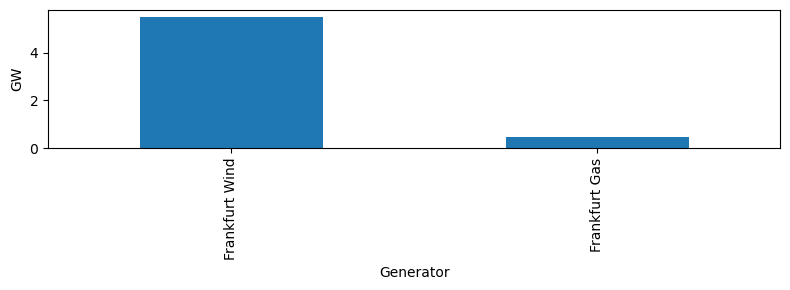

In [157]:
network.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))
plt.tight_layout()
network.generators_t.p.div(1e3)

<h1  style="color:white;font-size:20pt;font-weight:700"> The graph of optimal solution </h1>

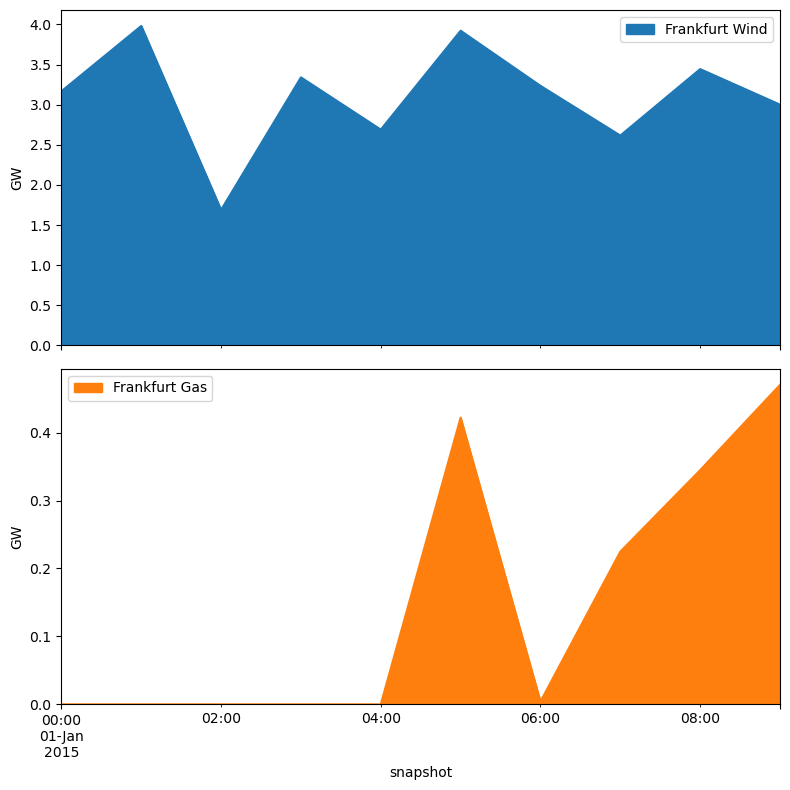

In [146]:
network.generators_t.p.div(1e3).plot.area(subplots=True, ylabel="GW")
plt.tight_layout()

<h1  style="color:white;font-size:20pt;font-weight:700"> The chart of optimal solution marginal price </h1>

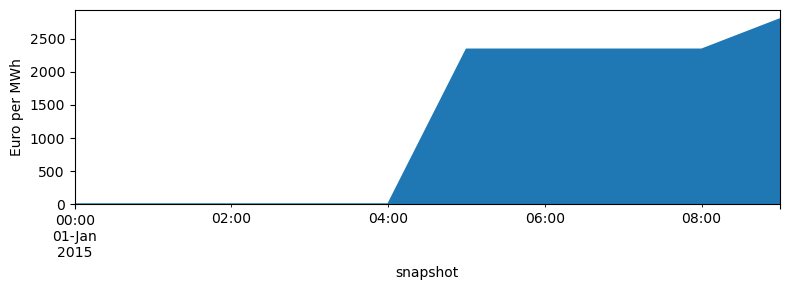

In [158]:
network.buses_t.marginal_price.mean(1).plot.area(figsize=(8, 3), ylabel="Euro per MWh" )
plt.tight_layout()


In [149]:
network.links_t.p0

Link,Norwich Converter,Norway Converter,Bremen Converter,DC link
snapshot,,,,
2015-01-01 00:00:00,0.0,0.0,0.0,0.0
2015-01-01 01:00:00,0.0,0.0,0.0,0.0
2015-01-01 02:00:00,0.0,0.0,0.0,0.0
2015-01-01 03:00:00,0.0,0.0,0.0,0.0
2015-01-01 04:00:00,0.0,0.0,0.0,0.0
2015-01-01 05:00:00,0.0,0.0,0.0,0.0
2015-01-01 06:00:00,0.0,0.0,0.0,0.0
2015-01-01 07:00:00,0.0,0.0,0.0,0.0
2015-01-01 08:00:00,0.0,0.0,0.0,0.0


In [150]:
network.buses_t.p

Bus,Frankfurt
2015-01-01 00:00:00,-0.000309
2015-01-01 01:00:00,-0.004818
2015-01-01 02:00:00,0.000656
2015-01-01 03:00:00,0.000191
2015-01-01 04:00:00,0.000806
2015-01-01 05:00:00,0.003985
2015-01-01 06:00:00,-0.001425
2015-01-01 07:00:00,-0.002435
2015-01-01 08:00:00,0.002537
2015-01-01 09:00:00,0.001680


<h1  style="color:red;font-size:40pt;font-weight:700"> From here to end there some simulation for showing the effect of changing the numbers </h1>

In [159]:
network2 = network.copy()

Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')


In [177]:
network2.generators

,Generator,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Frankfurt Wind,Frankfurt Wind,Frankfurt,5307.482522,1.000000,NaN,290.0,True,200.0,wind,Slack,...,0.0,0,0,1,0,NaN,NaN,NaN,NaN,5523.890
Frankfurt Gas,Frankfurt Gas,Frankfurt,457.543371,0.351809,NaN,150000.0,True,0.0,gas,PQ,...,0.0,0,0,1,0,NaN,NaN,NaN,NaN,470.237


In [197]:
network2.generators["capital_cost"].iloc[0] -=  2000

C:\Users\Asus\AppData\Local\Temp\ipykernel_24552\3385421139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network2.generators["capital_cost"].iloc[0] -=  2000


In [198]:
network2.generators

,Generator,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Frankfurt Wind,Frankfurt Wind,Frankfurt,1307.482522,1.000000,NaN,290.0,True,200.0,wind,Slack,...,0.0,0,0,1,0,NaN,NaN,NaN,NaN,5523.890
Frankfurt Gas,Frankfurt Gas,Frankfurt,457.543371,0.351809,NaN,150000.0,True,0.0,gas,PQ,...,0.0,0,0,1,0,NaN,NaN,NaN,NaN,470.237


In [202]:
network2.generators_t

{'p_min_pu': Empty DataFrame
 Columns: []
 Index: [2015-01-01 00:00:00, 2015-01-01 01:00:00, 2015-01-01 02:00:00, 2015-01-01 03:00:00, 2015-01-01 04:00:00, 2015-01-01 05:00:00, 2015-01-01 06:00:00, 2015-01-01 07:00:00, 2015-01-01 08:00:00, 2015-01-01 09:00:00],
 'p_max_pu': Generator            Manchester Wind  Frankfurt Wind  Norway Wind  \
 snapshot                                                            
 2015-01-01 00:00:00         0.930020        0.829699     0.974583   
 2015-01-01 01:00:00         0.485748        0.746219     0.481290   
 2015-01-01 02:00:00         0.233692        0.452386     0.407226   
 2015-01-01 03:00:00         0.257604        0.741427     0.599965   
 2015-01-01 04:00:00         0.626906        0.828638     0.524468   
 2015-01-01 05:00:00         0.603598        0.709917     0.009693   
 2015-01-01 06:00:00         0.678908        0.585600     0.220453   
 2015-01-01 07:00:00         0.361303        0.473442     0.823919   
 2015-01-01 08:00:00      

In [203]:
network2.optimize(solver_name="glpk")

Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Frankfurt Wind\t', 'Manchester Wind', 'Norway Wind'], dtype='object', name='Generator')
Index(['Bremen', 'Frankfurt2', 'London', 'Manchester', 'Norway', 'Norwich'], dtype='object')
Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Frankfurt Wind\t', 'Manchester Wind', 'Norway Wind'], dtype='object', name='Generator')
Index(['Bremen', 'Frankfurt2', 'London', 'Manchester', 'Norway', 'Norwich'], dtype='object')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
S

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-cmxkn3ky.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-v6stgymz.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-cmxkn3ky.lp'...
137 rows, 67 columns, 256 non-zeros
766 lines were read
GLPK Simplex Optimizer 5.0
137 rows, 67 columns, 256 non-zeros
Preprocessing...
111 rows, 66 columns, 230 non-zeros
Scaling...
 A: min|aij| =  4.524e-01  max|aij| =  1.000e+00  ratio =  2.211e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 111
      0: obj =  -6.875065557e+07 inf =   5.375e+04 (11)
     24: obj =  -6.104707256e+07 inf =   0.000e+00 (0)
*    30: obj =  -6.157460750e+07 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.2 Mb (170109 bytes)
Writing basic solution to 'C:\Users\Asus\AppData\Local\Temp\linopy-solve-v6stgymz.sol'...


('ok', 'optimal')

Generator
Frankfurt Wind    5.523890
Frankfurt Gas     0.470237
Name: p_nom_opt, dtype: float64

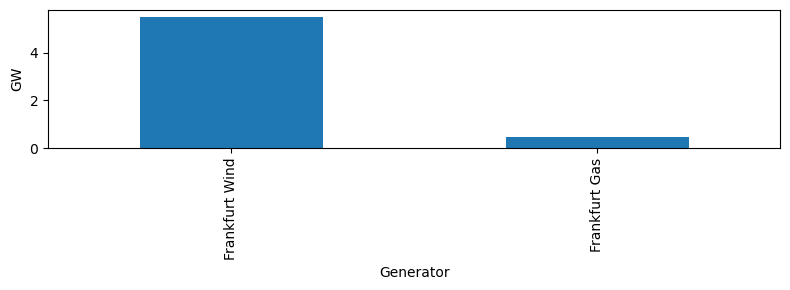

In [204]:
network2.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))
plt.tight_layout()
network2.generators.p_nom_opt.div(1e3)

In [166]:
network3 = network.copy() 

Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')


In [191]:
network3.generators["capital_cost"].iloc[0] +=  40000

C:\Users\Asus\AppData\Local\Temp\ipykernel_24552\1268568542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network3.generators["capital_cost"].iloc[0] +=  40000


In [192]:
network3.generators

,Generator,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Frankfurt Wind,Frankfurt Wind,Frankfurt,90107.482522,1.000000,NaN,290.0,True,200.0,wind,Slack,...,0.0,0,0,1,0,NaN,NaN,NaN,NaN,5523.890
Frankfurt Gas,Frankfurt Gas,Frankfurt,457.543371,0.351809,NaN,150000.0,True,0.0,gas,PQ,...,0.0,0,0,1,0,NaN,NaN,NaN,NaN,470.237


In [193]:
network3.optimize(solver_name="glpk")

Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Frankfurt Wind\t', 'Manchester Wind', 'Norway Wind'], dtype='object', name='Generator')
Index(['Bremen', 'Frankfurt2', 'London', 'Manchester', 'Norway', 'Norwich'], dtype='object')
Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Norwich Converter', 'Norway Converter', 'Bremen Converter', 'DC link'], dtype='object', name='Link')
Index(['Frankfurt Wind\t', 'Manchester Wind', 'Norway Wind'], dtype='object', name='Generator')
Index(['Bremen', 'Frankfurt2', 'London', 'Manchester', 'Norway', 'Norwich'], dtype='object')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.09s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
S

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-02xrs5yw.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-copc_oce.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-02xrs5yw.lp'...
137 rows, 67 columns, 256 non-zeros
766 lines were read
GLPK Simplex Optimizer 5.0
137 rows, 67 columns, 256 non-zeros
Preprocessing...
111 rows, 66 columns, 230 non-zeros
Scaling...
 A: min|aij| =  4.524e-01  max|aij| =  1.000e+00  ratio =  2.211e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 111
      0: obj =  -7.674265557e+07 inf =   5.375e+04 (11)
     24: obj =   4.479598099e+08 inf =   0.000e+00 (0)
*    31: obj =   4.031948885e+08 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.2 Mb (170109 bytes)
Writing basic solution to 'C:\Users\Asus\AppData\Local\Temp\linopy-solve-copc_oce.sol'...


('ok', 'optimal')

Generator
Frankfurt Wind    5.523890
Frankfurt Gas     0.470237
Name: p_nom_opt, dtype: float64

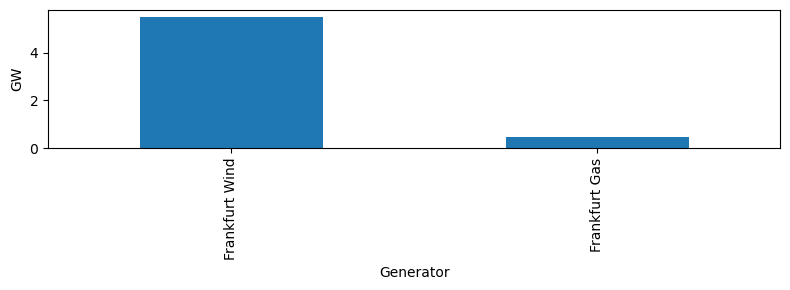

In [194]:
network3.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))
plt.tight_layout()
network3.generators.p_nom_opt.div(1e3)

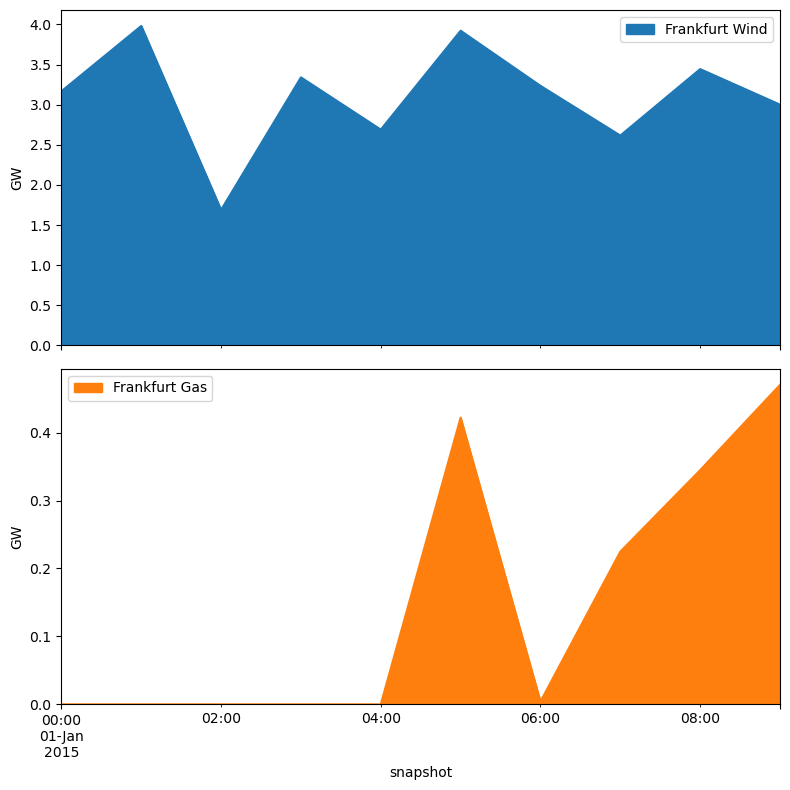

In [195]:
network3.generators_t.p.div(1e3).plot.area(subplots=True, ylabel="GW")
plt.tight_layout()

In [180]:
network2.generators.p_nom_opt.div(1e3)

Generator
Frankfurt Wind    5.523890
Frankfurt Gas     0.470237
Name: p_nom_opt, dtype: float64

In [181]:
network.generators.p_nom_opt.div(1e3)

Generator
Frankfurt Wind    5.523890
Frankfurt Gas     0.470237
Name: p_nom_opt, dtype: float64

In [182]:
network3.generators.p_nom_opt.div(1e3)

Generator
Frankfurt Wind    5.523890
Frankfurt Gas     0.470237
Name: p_nom_opt, dtype: float64

<h1  style="color:red;font-size:40pt;font-weight:700"> Simulation of Task 3 - Last Part </h1>

In [232]:
import numpy as np

# The number we deduce from Norway Wind 

In [239]:
data_norway_gas_frankfurt_wind = []
for _ in np.linspace(0,1000,10):
    network_test = network.copy()
    network_test.generators.capital_cost.iloc[2] -= _
    network_test.optimize(solver_name="glpk")
    data_norway_gas_frankfurt_wind.append(network_test.generators_t.p[["Norway Wind","Frankfurt Gas"]])


C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.33s


GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-xztj7zd5.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-8hgy0h36.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-xztj7zd5.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   1.210828068e+07 inf =   1.864e-11 (0) 1
*   239: obj =  -3.474256041e+06 inf =   1.755e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -3.47e+06
Solver model: not available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.69s


GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-fz4tc44t.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-d7jkjym4.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-fz4tc44t.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   1.125687614e+07 inf =   1.864e-11 (0) 1
*   233: obj =  -3.633544914e+06 inf =   1.583e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -3.63e+06
Solver model: not available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.28s
INFO:linopy.con

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-ljqrhq7g.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-sxxl68r1.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-ljqrhq7g.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   1.040547160e+07 inf =   1.864e-11 (0) 1
*   243: obj =  -3.792833787e+06 inf =   3.306e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.5s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -3.95e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-s8i1m10k.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-l17khiu7.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-s8i1m10k.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   9.554067064e+06 inf =   1.864e-11 (0) 1
*   243: obj =  -3.952122660e+06 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.38s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -4.11e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-jdya1f6e.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-cq2432da.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-jdya1f6e.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   8.702662527e+06 inf =   1.864e-11 (0) 1
*   240: obj =  -4.111411533e+06 inf =   1.068e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.29s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -4.27e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-shu7iejg.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-mbrw7dcs.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-shu7iejg.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   7.851257990e+06 inf =   1.864e-11 (0) 1
*   244: obj =  -4.270700406e+06 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.26s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -4.43e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-why1hpgh.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-sh7_3tpj.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-why1hpgh.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   6.999853453e+06 inf =   1.864e-11 (0) 1
*   244: obj =  -4.429989279e+06 inf =   5.667e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -4.60e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-y2vewmag.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-oyir5mj7.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-y2vewmag.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   6.148448915e+06 inf =   1.864e-11 (0) 1
*   242: obj =  -4.597878882e+06 inf =   2.637e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -4.91e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-dwe3cvye.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-yexs329p.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-dwe3cvye.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   5.297044378e+06 inf =   1.864e-11 (0) 1
*   241: obj =  -4.913814725e+06 inf =   2.637e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.
C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4181110212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_test.generators.capital_cost.iloc[2] -= _
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -5.23e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-xjirgjua.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-ly23xyry.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-xjirgjua.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   4.445639841e+06 inf =   1.864e-11 (0) 1
*   245: obj =  -5.229750567e+06 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.


As you see, when decreasing Norway Wind capital cost about 600-700 the switch from Frankfurt Gas to Norway Wind is occurred

In [241]:
data_norway_gas_frankfurt_wind 



[Generator            Norway Wind  Frankfurt Gas
 snapshot                                       
 2015-01-01 00:00:00    1492.6100          0.000
 2015-01-01 01:00:00     738.1070          0.000
 2015-01-01 02:00:00     624.5210          0.000
 2015-01-01 03:00:00     920.1060          0.000
 2015-01-01 04:00:00     804.3240          0.000
 2015-01-01 05:00:00      14.8647        982.034
 2015-01-01 06:00:00     338.0870          0.000
 2015-01-01 07:00:00    1263.5600          0.000
 2015-01-01 08:00:00     853.0340          0.000
 2015-01-01 09:00:00     673.8880        483.240,
 Generator            Norway Wind  Frankfurt Gas
 snapshot                                       
 2015-01-01 00:00:00    1492.6100          0.000
 2015-01-01 01:00:00     738.1070          0.000
 2015-01-01 02:00:00     624.5210          0.000
 2015-01-01 03:00:00     920.1060          0.000
 2015-01-01 04:00:00     804.3240          0.000
 2015-01-01 05:00:00      14.8647        982.034
 2015-01-01 06:00:0

<h1  style="color:red;font-size:40pt;font-weight:700"> From here to end, you see some simulation that are showing the effect of changing Norway Wind and Frankfurt Gas capital cost effect on optimal solution  </h1>

<h1  style="color:white;font-size:20pt;font-weight:700"> Decreasing Norway Wind capital cost </h1>

In [190]:
network3 = network.copy()


In [191]:
network3.generators


,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,type,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Manchester Wind,Manchester,2793.651603,1.000000,0.110000,80.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,4090.810
Manchester Gas,Manchester,196.615168,0.350026,4.532368,50000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Norway Wind,Norway,2184.374796,1.000000,0.090000,100.0,True,100.0,wind,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1533.600
Norway Gas,Norway,158.251250,0.356836,5.892845,20000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Frankfurt Wind,Frankfurt,2129.456122,1.000000,0.100000,110.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1667.720
Frankfurt Gas,Frankfurt,102.676953,0.351666,4.086322,80000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,982.034


In [195]:
network3.generators.capital_cost.iloc[2] -= 1000.0

C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\1028021462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network3.generators.capital_cost.iloc[2] -= 1000.0


In [196]:
network3.generators.capital_cost

Generator
Manchester Wind    2793.651603
Manchester Gas      196.615168
Norway Wind        1184.374796
Norway Gas          158.251250
Frankfurt Wind     2129.456122
Frankfurt Gas       102.676953
Name: capital_cost, dtype: float64

In [197]:
network3.optimize(solver_name="glpk")

Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.3s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -5.23e+06
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-h8gmeted.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-uudc420r.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-h8gmeted.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   4.445639841e+06 inf =   1.864e-11 (0) 1
*   245: obj =  -5.229750567e+06 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

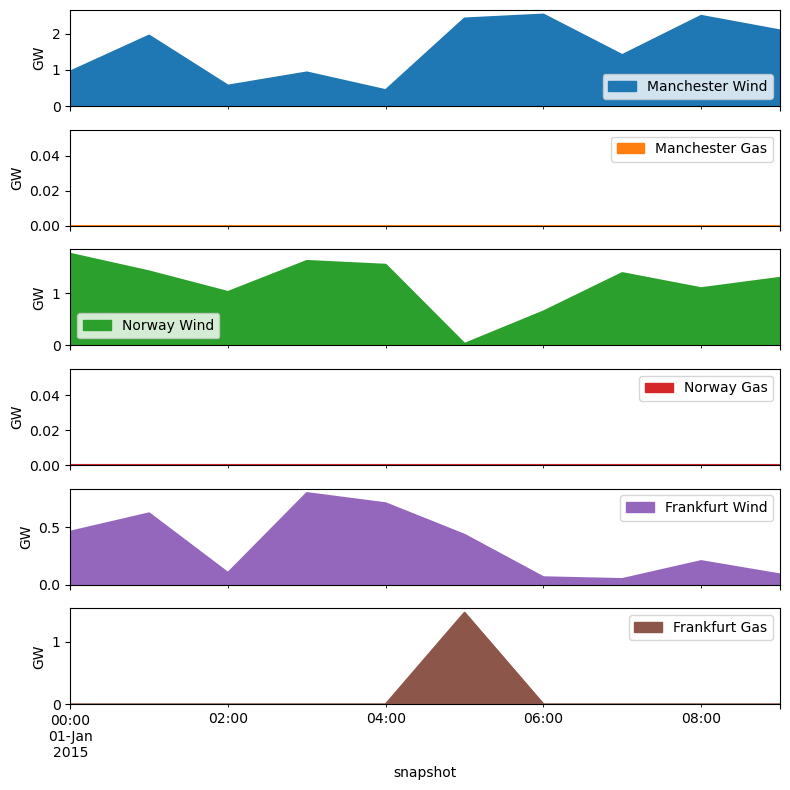

In [198]:
network3.generators_t.p.div(1e3).plot.area(subplots=True, ylabel="GW" )
plt.tight_layout()

In [238]:
network3.generators_t.p[["Norway Wind","Frankfurt Gas"]]

Generator,Norway Wind,Frankfurt Gas
snapshot,,
2015-01-01 00:00:00,1753.2700,0.00
2015-01-01 01:00:00,1416.6400,0.00
2015-01-01 02:00:00,1022.4000,0.00
2015-01-01 03:00:00,1616.5100,0.00
2015-01-01 04:00:00,1543.7300,0.00
2015-01-01 05:00:00,28.5297,1465.27
2015-01-01 06:00:00,648.8870,0.00
2015-01-01 07:00:00,1384.0300,0.00
2015-01-01 08:00:00,1094.5500,0.00


<h1  style="color:white;font-size:20pt;font-weight:700"> Decreasing Frankfurt Gas capital cost </h1>

In [217]:
network4 = network.copy()

In [219]:
network4.generators.capital_cost.iloc[5] -= 40.0

C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\3353419686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network4.generators.capital_cost.iloc[5] -= 40.0


In [220]:
network4.generators

,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,type,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Manchester Wind,Manchester,2793.651603,1.000000,0.110000,80.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,4090.810
Manchester Gas,Manchester,196.615168,0.350026,4.532368,50000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Norway Wind,Norway,2184.374796,1.000000,0.090000,100.0,True,100.0,wind,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1533.600
Norway Gas,Norway,158.251250,0.356836,5.892845,20000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Frankfurt Wind,Frankfurt,2129.456122,1.000000,0.100000,110.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1667.720
Frankfurt Gas,Frankfurt,62.676953,0.351666,4.086322,80000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,982.034


In [221]:
network4.optimize(solver_name="glpk")


Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -3.14e+05
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-_l1lagib.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-m9y_izjw.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-_l1lagib.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -1.784321118e+07 inf =   9.486e+04 (101)
    162: obj =   1.530828068e+07 inf =   1.864e-11 (0) 1
*   239: obj =  -3.135374199e+05 inf =   1.755e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

Generator,Manchester Wind,Manchester Gas,Norway Wind,Norway Gas,Frankfurt Wind,Frankfurt Gas
snapshot,,,,,,
2015-01-01 00:00:00,0.741983,0.0,1.492610,0.0,0.932389,0.000000
2015-01-01 01:00:00,1.987100,0.0,0.738107,0.0,1.255650,0.000000
2015-01-01 02:00:00,0.858392,0.0,0.624521,0.0,0.205906,0.000000
2015-01-01 03:00:00,0.807813,0.0,0.920106,0.0,1.612150,0.000000
2015-01-01 04:00:00,0.452527,0.0,0.804324,0.0,1.432590,0.000000
2015-01-01 05:00:00,2.469210,0.0,0.014865,0.0,0.877480,0.982034
2015-01-01 06:00:00,2.770850,0.0,0.338087,0.0,0.129904,0.000000
2015-01-01 07:00:00,1.478020,0.0,1.263560,0.0,0.098435,0.000000
2015-01-01 08:00:00,2.520690,0.0,0.853034,0.0,0.414520,0.000000


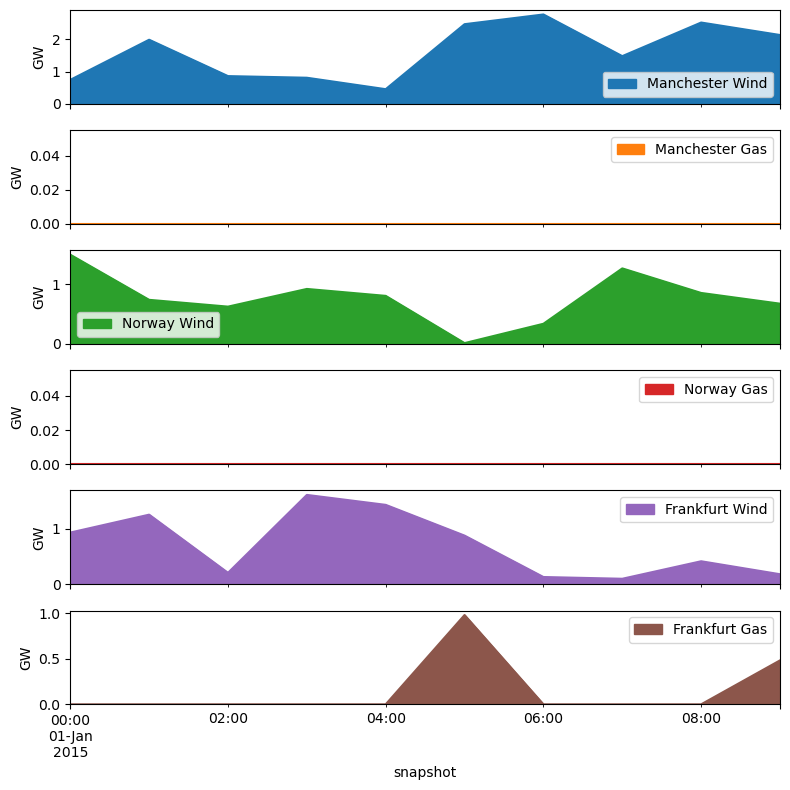

In [230]:
network4.generators_t.p.div(1e3).plot.area(subplots=True, ylabel="GW" )
plt.tight_layout()
network4.generators_t.p.div(1e3)

<h1  style="color:white;font-size:20pt;font-weight:700"> Increasing Frankfurt Gas capital cost </h1>

In [224]:
network5 = network.copy()

In [226]:
network5.generators.capital_cost.iloc[5] += 200.0

C:\Users\Asus\AppData\Local\Temp\ipykernel_18912\4102679053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network5.generators.capital_cost.iloc[5] += 200.0


In [227]:
network5.generators

,bus,capital_cost,efficiency,marginal_cost,p_nom,p_nom_extendable,p_nom_min,carrier,control,type,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Manchester Wind,Manchester,2793.651603,1.000000,0.110000,80.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,4090.810
Manchester Gas,Manchester,196.615168,0.350026,4.532368,50000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Norway Wind,Norway,2184.374796,1.000000,0.090000,100.0,True,100.0,wind,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1533.600
Norway Gas,Norway,158.251250,0.356836,5.892845,20000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000
Frankfurt Wind,Frankfurt,2129.456122,1.000000,0.100000,110.0,True,100.0,wind,Slack,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1667.720
Frankfurt Gas,Frankfurt,302.676953,0.351666,4.086322,80000.0,True,0.0,gas,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,982.034


In [228]:
network5.optimize(solver_name="glpk")


Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.21s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 188 primals, 468 duals
Objective: -1.94e+07
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\Asus\AppData\Local\Temp\linopy-problem-mxf98_6p.lp --output
 C:\Users\Asus\AppData\Local\Temp\linopy-solve-jzx42dw8.sol
Reading problem data from 'C:\Users\Asus\AppData\Local\Temp\linopy-problem-mxf98_6p.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -3.704321118e+07 inf =   9.486e+04 (101)
    162: obj =  -3.891719324e+06 inf =   1.864e-11 (0) 1
*   238: obj =  -1.944798213e+07 inf =   7.092e-13 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb (65

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

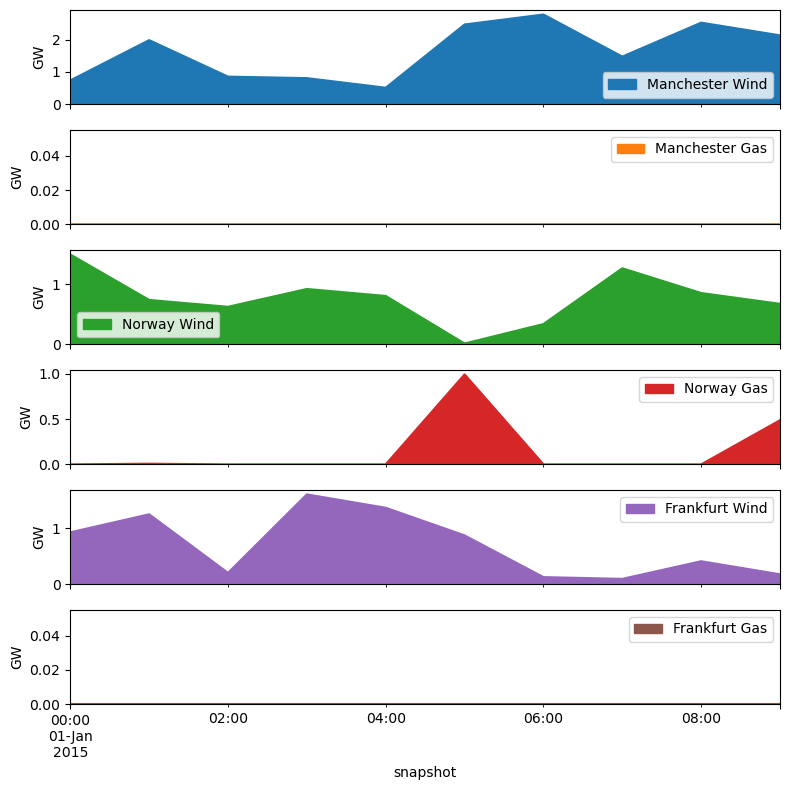

In [229]:
network5.generators_t.p.div(1e3).plot.area(subplots=True, ylabel="GW" )
plt.tight_layout()